# Projeto diabetes

O diabetes é uma doença crônica grave na qual os indivíduos perdem a capacidade de regular efetivamente os níveis de glicose no sangue e pode levar a uma redução na qualidade de vida e na expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa telefônica relacionada à saúde que é coletada anualmente pelo CDC (Centro de Controle e Prevenção de Doenças dos Estados Unidos). A cada ano, a pesquisa coleta respostas de milhares de americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e o uso de serviços preventivos. Para este projeto, foi utilizado conjunto de dados disponível no Kaggle para o ano de 2015.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dicionário de dados:

- `Diabetes_binary`: 0 = sem diabetes, 1 = com diabetes
- `HighBP`: 0 = sem pressão alta, 1 = com pressão alta
- `HighChol`: 0 = sem colesterol alto, 1 = com colesterol alto
- `CholCheck`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `BMI`: Índice de Massa Corporal (IMC)
- `Smoker`: 0 = não fumante, 1 = fumante
- `Stroke`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `HeartDiseaseorAttack`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `PhysActivity`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Fruits`: 0 = não consome frutas, 1 = consome frutas
- `Veggies`: 0 = não consome vegetais, 1 = consome vegetais
- `HvyAlcoholConsump`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `AnyHealthcare`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `NoDocbcCost`: 0 = não deixou de ir ao médico por questões financeiras, 1 = deixou de ir ao médico por questões financeiras (últimos 12 meses)
- `GenHlth`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `MentHlth`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `PhysHlth`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `DiffWalk`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Sex`: 0 = feminino, 1 = masculino
- `Age`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Education`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Income`: Renda anual em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

##Importações e ajustes iniciais

In [1]:
# Frameworks
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Configurações
from src.config import DADOS_TRATADOS

# Avisos
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Ajustes casas decimais no pandas
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# Definição da paleta de cores
paleta = ['#5A189A', '#D81159', '#4C1E4F', '#DA627D','#5E548E', '#479D94', '#55396F', '#F08080','#023E7D', '#427AA1']

In [5]:
# Layout
sns.set_theme(style='darkgrid', context='notebook', palette=paleta)

##Verificação dos dados

Carregamento da base de dados e verificação do início e fim da tabela para ver se o carregamento foi feito com sucesso.

In [6]:
df_diabetes = pd.read_parquet(DADOS_TRATADOS)

In [7]:
with pd.option_context("display.max_columns", None):
    display(df_diabetes.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No,Yes,No,Yes,26,No,No,No,Yes,No,Yes,No,Yes,No,Good,5,30,No,Masc,35-39,College,75k+
1,No,Yes,Yes,Yes,26,Yes,Yes,No,No,Yes,No,No,Yes,No,Good,0,0,No,Masc,75-79,College,75k+
2,No,No,No,Yes,26,No,No,No,Yes,Yes,Yes,No,Yes,No,Excellent,0,10,No,Masc,80+,College,75k+
3,No,Yes,Yes,Yes,28,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Good,0,3,No,Masc,70-74,College,75k+
4,No,No,No,Yes,29,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Very good,0,0,No,Fem,55-59,College inc.,75k+


In [8]:
with pd.option_context("display.max_columns", None):
    display(df_diabetes.tail())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,Yes,No,Yes,Yes,37,No,No,No,No,No,Yes,No,Yes,No,Fair,0,0,No,Fem,45-49,High schl.,< 10k
70688,Yes,No,Yes,Yes,29,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Very good,0,0,Yes,Masc,65-69,High schl. inc.,< 50k
70689,Yes,Yes,Yes,Yes,25,No,No,Yes,No,Yes,No,No,Yes,No,Poor,15,0,Yes,Fem,80+,College,< 25k
70690,Yes,Yes,Yes,Yes,18,No,No,No,No,No,No,No,Yes,No,Fair,0,0,Yes,Fem,70-74,Element.,< 25k
70691,Yes,Yes,Yes,Yes,25,No,No,Yes,Yes,Yes,No,No,Yes,No,Very good,0,0,No,Fem,60-64,College,< 15k


In [9]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_binary       70692 non-null  category
 1   HighBP                70692 non-null  category
 2   HighChol              70692 non-null  category
 3   CholCheck             70692 non-null  category
 4   BMI                   70692 non-null  int64   
 5   Smoker                70692 non-null  category
 6   Stroke                70692 non-null  category
 7   HeartDiseaseorAttack  70692 non-null  category
 8   PhysActivity          70692 non-null  category
 9   Fruits                70692 non-null  category
 10  Veggies               70692 non-null  category
 11  HvyAlcoholConsump     70692 non-null  category
 12  AnyHealthcare         70692 non-null  category
 13  NoDocbcCost           70692 non-null  category
 14  GenHlth               70692 non-null  category
 15  Me

##Resultados principais

Nesta seção serão apresentados os principais resultados obtidos com base na exploração dos dados.

Apesar de vários fatores estarem relacionados ao desfecho de diabetes, há indícios de que principais são relacionados diretamente a condições de saúde (presssão sanguínea alta, colesterol alto, dificuldade para caminhar e histórico de doenças cardíacas) e percepção de saúde. Além disso, fatores como idade e renda também aparentam ter alguma relação.

In [10]:
def transformação_percentual(coluna, categoria, categoria_como_lista=False):
  if(categoria_como_lista):
    df_coluna_filtrada = df_diabetes[[coluna, 'Diabetes_binary']][df_diabetes[coluna].isin(categoria)]
  else:
    df_coluna_filtrada = df_diabetes[[coluna, 'Diabetes_binary']][df_diabetes[coluna] == categoria]

  total_entradas = len(df_coluna_filtrada)
  diabetes_sim_percent = df_coluna_filtrada['Diabetes_binary'][df_coluna_filtrada['Diabetes_binary'] == 'Yes'].count() / total_entradas
  diabetes_nao_percent = df_coluna_filtrada['Diabetes_binary'][df_coluna_filtrada['Diabetes_binary'] == 'No'].count() / total_entradas
  return [diabetes_sim_percent, diabetes_nao_percent]

In [11]:
df_recorte_binario = pd.DataFrame({
    'Desfecho de diabetes': ['Sim', 'Não'],
    'Pressão sanguínea alta': transformação_percentual('HighBP', 'Yes'),
    'Colesterol alto': transformação_percentual('HighChol', 'Yes'),
    'Ocorrência de ataque ou doença cardíaca': transformação_percentual('HeartDiseaseorAttack', 'Yes'),
    'Dificuldade para caminhar': transformação_percentual('DiffWalk', 'Yes'),
    'Ausência de atividade física': transformação_percentual('PhysActivity', 'No'),
    'Saúde geral ruim': transformação_percentual('GenHlth', 'Poor'),
    'Idade maior que 59 anos': transformação_percentual('Age', ['60-64', '65-69', '70-74', '75-79', ' 80+'], True),
    'Ensino médio incompleto ou anterior': transformação_percentual('Education', ['No schl.', 'Element.', 'High schl. inc.'], True),
    'Renda anual abaixo de $25.000': transformação_percentual('Income', ['< 10k', '< 15k', '< 20k', '< 25k'], True)
})

In [12]:
df_recorte_binario = df_recorte_binario.set_index('Desfecho de diabetes')

In [13]:
df_recorte_binario.head()

,Pressão sanguínea alta,Colesterol alto,Ocorrência de ataque ou doença cardíaca,Dificuldade para caminhar,Ausência de atividade física,Saúde geral ruim,Idade maior que 59 anos,Ensino médio incompleto ou anterior,Renda anual abaixo de $25.000
Desfecho de diabetes,,,,,,,,,
Sim,0.67,0.64,0.75,0.73,0.62,0.79,0.60,0.68,0.64
Não,0.33,0.36,0.25,0.27,0.38,0.21,0.40,0.32,0.36


Recorte dos principais fatores relacionados ao desfecho de diabetes

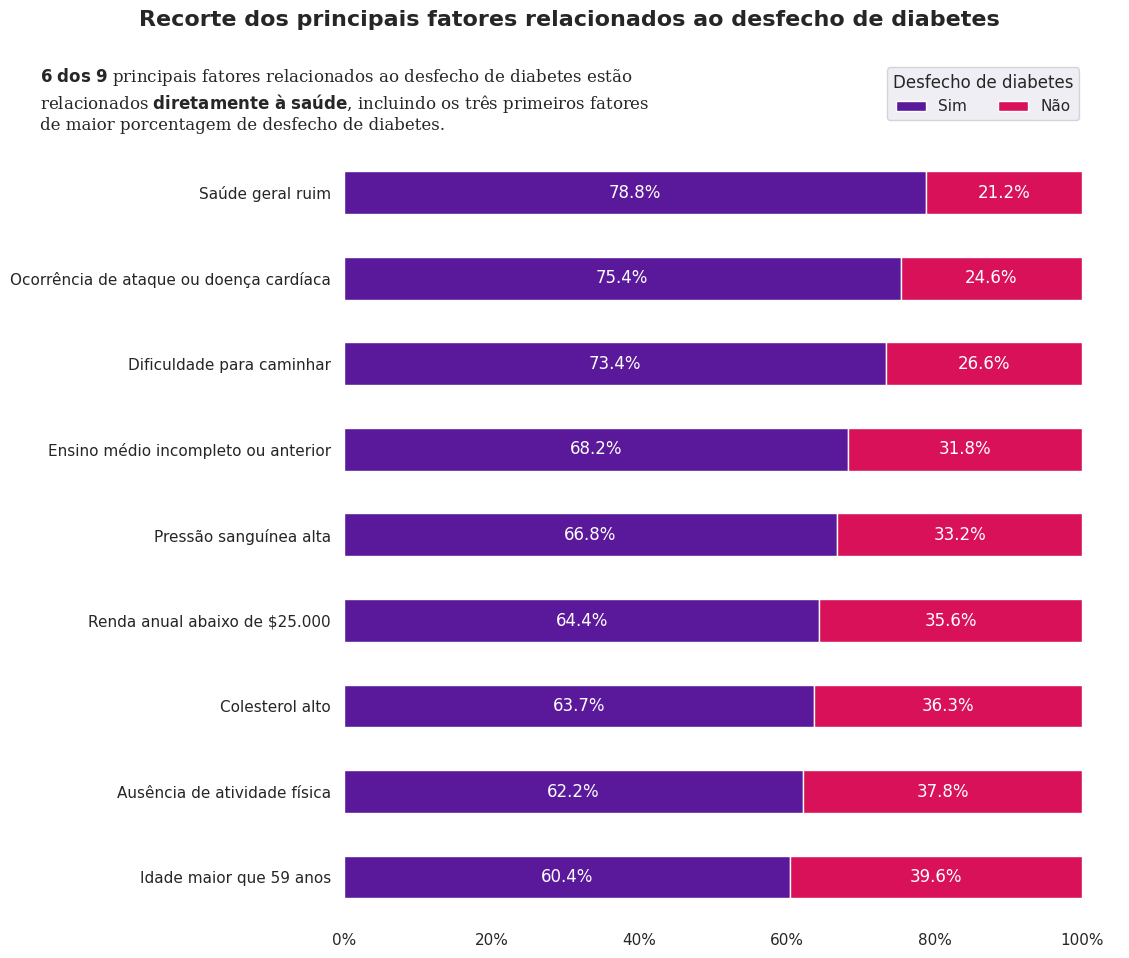

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
bar = df_recorte_binario.T.sort_values('Sim').plot(kind="barh", stacked=True, ax=ax)
bar.grid(False)
ax.set_facecolor('white')

bar.xaxis.set_major_formatter(PercentFormatter(1))
fig.suptitle("Recorte dos principais fatores relacionados ao desfecho de diabetes\n", fontsize=16, x=0.35, y=1.02, weight='bold')
fig.text(
    -0.2, 0.88,
    r'''
    $\bf{6}$ $\bf{dos}$ $\bf{9}$ principais fatores relacionados ao desfecho de diabetes estão
    relacionados $\bf{diretamente}$ $\bf{à}$ $\bf{saúde}$, incluindo os três primeiros fatores
    de maior porcentagem de desfecho de diabetes.
    ''',
    fontsize=12, fontweight='light', fontfamily='serif'
)

for barra in bar.containers:
  bar.bar_label(barra, label_type='center', labels=[f'{particao.get_width():.1%}' for particao in barra], color='white')

legenda = bar.get_legend()
legenda.remove()
fig.legend(loc='upper left', ncols=2, title='Desfecho de diabetes', bbox_to_anchor=(0.66, 0.97))

plt.show()